In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/CarCS1.csv')
data.head()

,Timestamp,Arbitration_ID,DLC,D0,D1,D2,D3,D4,D5,D6,D7,Class,SubClass
0,1.597759e+09,854,8,0,0,0.0,128.0,22.0,0.0,0.0,0.0,Normal,Normal
1,1.597759e+09,870,7,49,234,10.0,49.0,48.0,0.0,1.0,NaN,Normal,Normal
2,1.597759e+09,871,8,0,0,0.0,0.0,0.0,0.0,197.0,10.0,Normal,Normal
3,1.597759e+09,872,8,0,0,0.0,0.0,0.0,228.0,10.0,64.0,Normal,Normal
4,1.597759e+09,608,8,5,49,2.0,48.0,0.0,189.0,79.0,22.0,Normal,Normal


In [ ]:
import statistics
for i in ('D2','D3','D4','D5','D6','D7'):
  m=statistics.mode(data[i])
  data[i]=data[i].fillna(m)
data.isnull().sum()

Timestamp         0
Arbitration_ID    0
DLC               0
D0                0
D1                0
D2                0
D3                0
D4                0
D5                0
D6                0
D7                0
Class             0
SubClass          0
dtype: int64

In [ ]:
for i in data.columns:
  if data[i].dtype=='object':
    data[i]=LabelEncoder().fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312119 entries, 0 to 3312118
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Timestamp       float64
 1   Arbitration_ID  int64  
 2   DLC             int64  
 3   D0              int64  
 4   D1              int64  
 5   D2              float64
 6   D3              float64
 7   D4              float64
 8   D5              float64
 9   D6              float64
 10  D7              float64
 11  Class           int64  
 12  SubClass        int64  
dtypes: float64(7), int64(6)
memory usage: 328.5 MB


In [ ]:
set1=data.copy()
set2=data.copy()

In [ ]:
y1=set1['Class']
x1=set1.drop(['SubClass','Class'],axis=1)

In [ ]:
a=set2[set2['SubClass']==0]
b=set2[set2['SubClass']==1]
c=set2[set2['SubClass']==2]
d=set2[set2['SubClass']==3]
e=set2[set2['SubClass']==4]

In [ ]:
set2=pd.concat([a,b,d,e],axis=0)
y2=set2['SubClass']
x2=set2.drop(['SubClass','Class'],axis=1)

In [ ]:
x1=StandardScaler().fit_transform(x1)
x2=StandardScaler().fit_transform(x2)

In [ ]:
y1.unique()

array([1, 0])

In [ ]:
y2.unique()

array([0, 1, 3, 4])

In [ ]:
y2=LabelEncoder().fit_transform(y2)

In [ ]:
from tensorflow.keras.utils import to_categorical
y2=to_categorical(y2,num_classes=4)

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,stratify=y1)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((2649695, 11), (662424, 11), (2649695,), (662424,))

In [ ]:
x1_train=np.expand_dims(x1_train,axis=-1)
x1_test=np.expand_dims(x1_test,axis=-1)

In [ ]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,stratify=y2)
x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape

((239526, 11), (59882, 11), (239526, 4), (59882, 4))

In [ ]:
x2_train=np.expand_dims(x2_train,axis=-1)
x2_test=np.expand_dims(x2_test,axis=-1)

In [ ]:
model1=Sequential()
model1.add(Input(shape=(11,1)))
model1.add(LSTM(16,activation='tanh'))
model1.add(BatchNormalization())
model1.add(GaussianNoise(0.2))
model1.add(Dropout(0.1))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 gaussian_noise (GaussianNo  (None, 16)                0         
 ise)                                                            
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1233 (4.82 KB)
Trainable params: 1201 (4.6

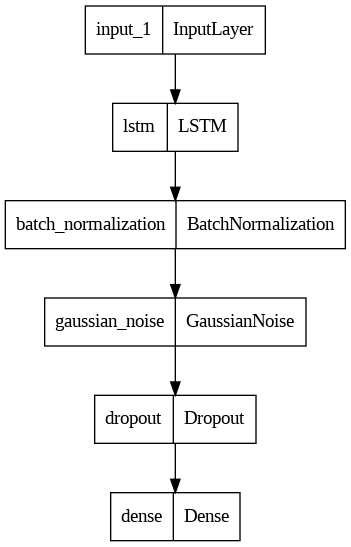

In [ ]:
from keras.utils import plot_model
plot_model(model1)

In [ ]:
model1.compile('adam','binary_crossentropy',metrics=['binary_accuracy','Precision','Recall','AUC'])

In [ ]:
history1=model1.fit(x1_train,y1_train,epochs=20,batch_size=30000,validation_data=(x1_test,y1_test))

Epoch 1/20
89/89 [==============================] - 38s 388ms/step - loss: 0.6031 - binary_accuracy: 0.7093 - precision: 0.9468 - recall: 0.7209 - auc: 0.6965 - val_loss: 0.5085 - val_binary_accuracy: 0.9096 - val_precision: 0.9096 - val_recall: 1.0000 - val_auc: 0.8439
Epoch 2/20
89/89 [==============================] - 38s 424ms/step - loss: 0.4165 - binary_accuracy: 0.8616 - precision: 0.9537 - recall: 0.8911 - auc: 0.8020 - val_loss: 0.3491 - val_binary_accuracy: 0.9096 - val_precision: 0.9096 - val_recall: 1.0000 - val_auc: 0.8596
Epoch 3/20
89/89 [==============================] - 33s 368ms/step - loss: 0.2766 - binary_accuracy: 0.9248 - precision: 0.9602 - recall: 0.9570 - auc: 0.8569 - val_loss: 0.2537 - val_binary_accuracy: 0.9326 - val_precision: 0.9312 - val_recall: 0.9997 - val_auc: 0.8641
Epoch 4/20
89/89 [==============================] - 35s 389ms/step - loss: 0.1784 - binary_accuracy: 0.9580 - precision: 0.9651 - recall: 0.9896 - auc: 0.8828 - val_loss: 0.1799 - val_bin

In [ ]:
model1.evaluate(x1_train,y1_train)

82803/82803 [==============================] - 239s 3ms/step - loss: 0.1043 - binary_accuracy: 0.9760 - precision: 0.9747 - recall: 0.9995 - auc: 0.9280


[0.10425889492034912,
 0.9759848117828369,
 0.9747239947319031,
 0.999517023563385,
 0.9280022382736206]

In [ ]:
model1.evaluate(x1_test,y1_test)

20701/20701 [==============================] - 59s 3ms/step - loss: 0.1038 - binary_accuracy: 0.9762 - precision: 0.9749 - recall: 0.9996 - auc: 0.9289


[0.10376299172639847,
 0.9761844277381897,
 0.9748926758766174,
 0.9995601773262024,
 0.9289302825927734]

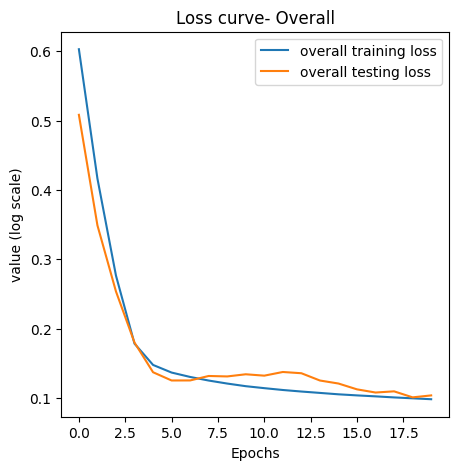

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss curve- Overall")
plt.plot(history1.history["loss"], label="overall training loss")
plt.plot(history1.history["val_loss"], label="overall testing loss")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

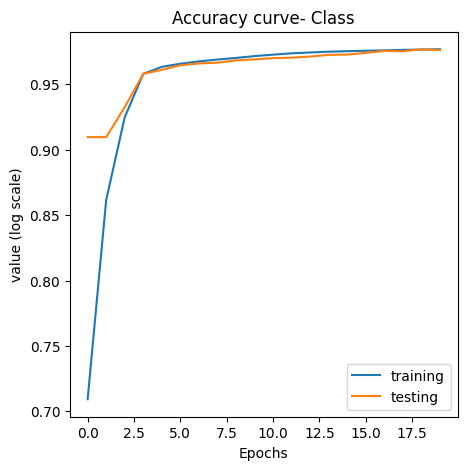

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Accuracy curve- Class")
plt.plot(history1.history["binary_accuracy"], label="training")
plt.plot(history1.history["val_binary_accuracy"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

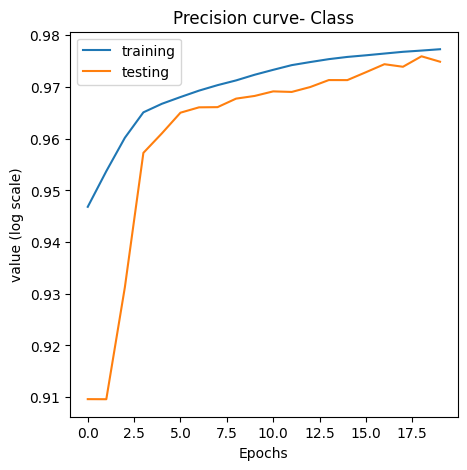

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Precision curve- Class")
plt.plot(history1.history["precision"], label="training")
plt.plot(history1.history["val_precision"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

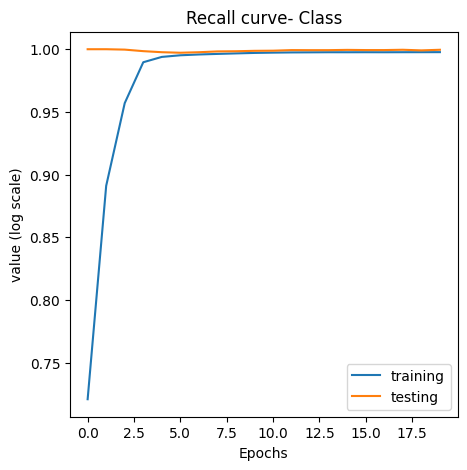

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Recall curve- Class")
plt.plot(history1.history["recall"], label="training")
plt.plot(history1.history["val_recall"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

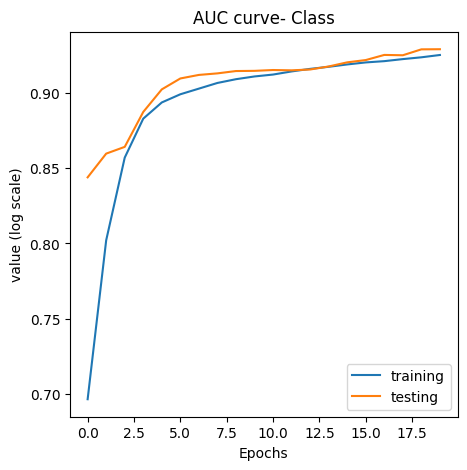

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("AUC curve- Class")
plt.plot(history1.history["auc"], label="training")
plt.plot(history1.history["val_auc"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred=model1.predict(x1_test)

20701/20701 [==============================] - 52s 2ms/step


(662424,) (662424, 1)
class classification CM-test


<Axes: >

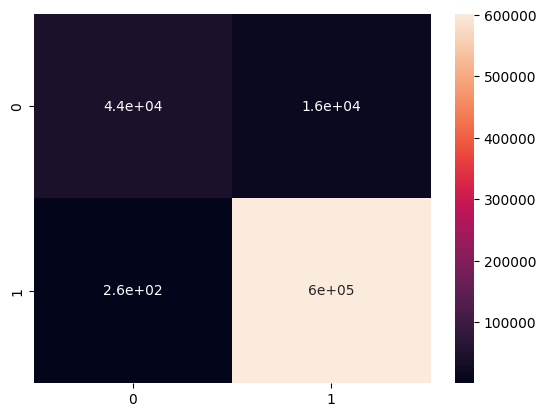

In [ ]:
y_pred_0 = (y_pred>=0.5)
print(y1_test.shape,y_pred_0.shape)
print('class classification CM-test')
sns.heatmap(confusion_matrix(y1_test,y_pred_0), annot=True)

In [ ]:
print('class classification report-test')
print(classification_report(y1_test,y_pred_0))

class classification report-test
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     59882
           1       0.97      1.00      0.99    602542

    accuracy                           0.98    662424
   macro avg       0.98      0.87      0.92    662424
weighted avg       0.98      0.98      0.97    662424



In [ ]:
model2=Sequential()
model2.add(Input(shape=(11,1)))
model2.add(LSTM(16,activation='tanh'))
model2.add(BatchNormalization())
model2.add(GaussianNoise(0.2))
model2.add(Dense(4,activation='relu'))
model2.add(Dense(4,activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 16)                1152      
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 gaussian_noise_1 (Gaussian  (None, 16)                0         
 Noise)                                                          
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
Total params: 1304 (5.09 KB)
Trainable params: 1272 (4

In [ ]:
model2.compile('adam','categorical_crossentropy',metrics=['categorical_accuracy','Precision','Recall','AUC'])

In [ ]:
history2=model2.fit(x2_train,y2_train,epochs=20,batch_size=5000,validation_data=(x2_test,y2_test))

Epoch 1/20
48/48 [==============================] - 8s 102ms/step - loss: 1.2260 - categorical_accuracy: 0.4721 - precision: 0.9509 - recall: 0.1241 - auc: 0.7076 - val_loss: 1.2268 - val_categorical_accuracy: 0.8138 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8579
Epoch 2/20
48/48 [==============================] - 5s 100ms/step - loss: 0.7940 - categorical_accuracy: 0.7989 - precision: 0.9571 - recall: 0.6499 - auc: 0.9078 - val_loss: 0.9985 - val_categorical_accuracy: 0.8144 - val_precision: 1.0000 - val_recall: 1.6700e-04 - val_auc: 0.9185
Epoch 3/20
48/48 [==============================] - 3s 69ms/step - loss: 0.5369 - categorical_accuracy: 0.8337 - precision: 0.9417 - recall: 0.7848 - auc: 0.9569 - val_loss: 0.7966 - val_categorical_accuracy: 0.8352 - val_precision: 0.9963 - val_recall: 0.6745 - val_auc: 0.9566
Epoch 4/20
48/48 [==============================] - 3s 69ms/step - loss: 0.4156 - categorical_accuracy: 0.8704 - precision: 0.9428 - recall: 0.7936 -

In [ ]:
model2.evaluate(x2_train,y2_train)

7486/7486 [==============================] - 24s 3ms/step - loss: 0.1005 - categorical_accuracy: 0.9553 - precision: 0.9741 - recall: 0.9548 - auc: 0.9981


[0.10051030665636063,
 0.9553075432777405,
 0.9741460084915161,
 0.9548441767692566,
 0.9980520606040955]

In [ ]:
model2.evaluate(x2_test,y2_test)

1872/1872 [==============================] - 6s 3ms/step - loss: 0.1011 - categorical_accuracy: 0.9550 - precision: 0.9742 - recall: 0.9547 - auc: 0.9980


[0.10110531002283096,
 0.9549614191055298,
 0.9741662740707397,
 0.9546608328819275,
 0.9980384707450867]

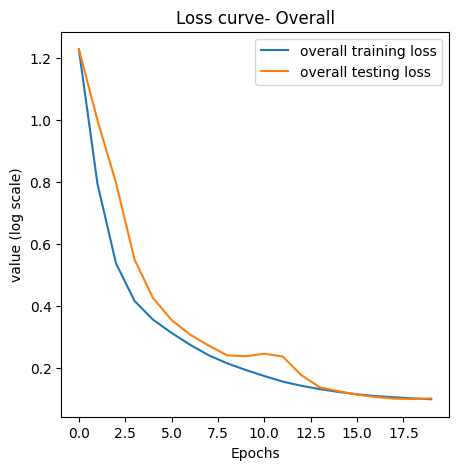

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss curve- Overall")
plt.plot(history2.history["loss"], label="overall training loss")
plt.plot(history2.history["val_loss"], label="overall testing loss")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

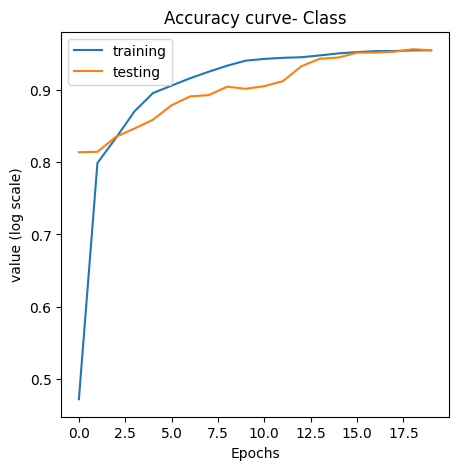

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Accuracy curve- Class")
plt.plot(history2.history["categorical_accuracy"], label="training")
plt.plot(history2.history["val_categorical_accuracy"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

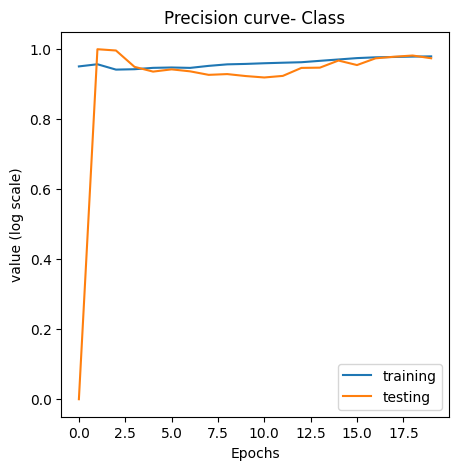

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Precision curve- Class")
plt.plot(history2.history["precision"], label="training")
plt.plot(history2.history["val_precision"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

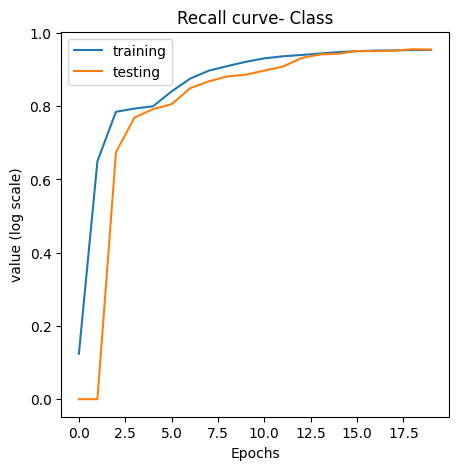

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Recall curve- Class")
plt.plot(history2.history["recall"], label="training")
plt.plot(history2.history["val_recall"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

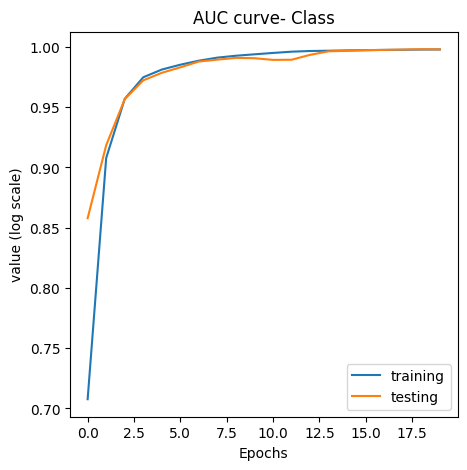

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("AUC curve- Class")
plt.plot(history2.history["auc"], label="training")
plt.plot(history2.history["val_auc"], label="testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

1872/1872 [==============================] - 5s 3ms/step
class classification CM-test


<Axes: >

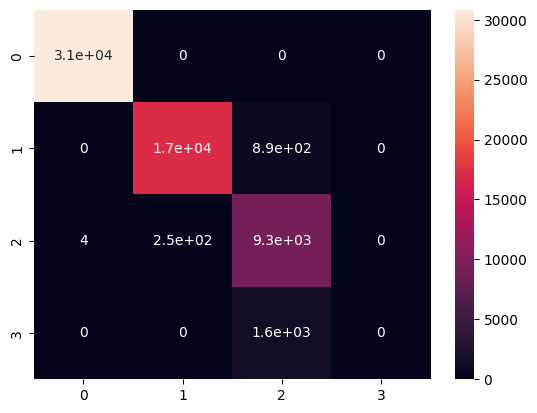

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred=model2.predict(x2_test)
y_pred_1 = np.argmax(y_pred,axis=1)
y2_test=np.argmax(y2_test,axis=1)
print('class classification CM-test')
sns.heatmap(confusion_matrix(y2_test,y_pred_1), annot=True)

In [ ]:
print('class classification report-test')
print(classification_report(y2_test,y_pred_1))

class classification report-test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30836
           1       0.99      0.95      0.97     17976
           2       0.79      0.97      0.87      9519
           3       0.00      0.00      0.00      1551

    accuracy                           0.95     59882
   macro avg       0.69      0.73      0.71     59882
weighted avg       0.94      0.95      0.94     59882



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model1.save('stage-1-lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2.save('stage-2-lstm.h5')